<a href="https://colab.research.google.com/github/TranTan1306/BaiTapAI/blob/main/Banknotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
folder = '/content/drive/MyDrive/BT AI/banknote/'
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from os.path import isdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.utils import to_categorical

In [ ]:
photos, labels = list(), list()
for file in listdir(folder):
  output = 0
  if file.startswith('5k '):
    output = 1
  if file.startswith('10k '):
    output = 2
  if file.startswith('20k '):
    output = 3
  if file.startswith('50k '):
    output = 4
  if file.startswith('100k '):
    output = 5
  if file.startswith('500k '):
    output = 6
  img =load_img(folder+file,target_size=(30,40))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('note_photos.npy',photos)
save('note_labels.npy',labels)

(360, 30, 40, 3) (360,)


In [ ]:
x_train = np.load('/content/note_photos.npy')
y_train = np.load('/content/note_labels.npy')

In [ ]:
x_train = x_train.astype('float32')/255
y_train = to_categorical(y_train,10)

In [ ]:
#32 lan tich chap
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(30,40,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#64 lan tich chap
model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#128 lan tich chap
model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
train = model.fit(x_train,y_train,batch_size=32,epochs = 100,verbose = 1)

Epoch 1/100
12/12 [==============================] - 1s 7ms/step - loss: 1.9583 - accuracy: 0.1972
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 1.8472 - accuracy: 0.1917
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 1.7802 - accuracy: 0.2250
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 1.7378 - accuracy: 0.2472
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 1.6591 - accuracy: 0.2806
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 1.5911 - accuracy: 0.3278
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 1.5259 - accuracy: 0.3222
Epoch 8/100
12/12 [==============================] - 0s 6ms/step - loss: 1.4772 - accuracy: 0.3583
Epoch 9/100
12/12 [==============================] - 0s 5ms/step - loss: 1.4512 - accuracy: 0.4000
Epoch 10/100
12/12 [==============================] - 0s 6ms/step - loss: 1.3068 - accuracy: 0.4361
Epoch 11/

1/1 [==============================] - 0s 29ms/step


'500k'

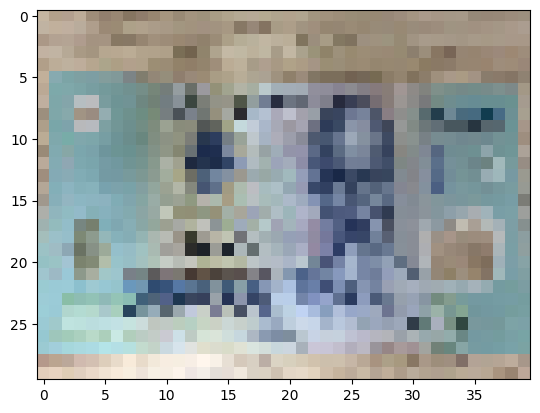

In [ ]:
pred = {1: '5k',2:'10k', 3:'20k', 4:'50k', 5:'100k', 6:'500k' }
img = load_img("/content/drive/MyDrive/500k_test.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
pred[result[0]]

In [ ]:
model.save('/content/drive/MyDrive/Train model/banknote_model.h5')